### Imports

In [4]:
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(
    './data/final_dataset.csv',
)

## Data Description

Each row contains some properties referring particular established session

| Atriibute            | Description                                       |
|-----------------|-------------------------------------------|
| fl_dur          | Flow duration                              |
| tot_fw_pk       | Total packets in the forward direction   |
| tot_bw_pk       | Total packets in the backward direction  |
| tot_l_fw_pkt    | Total size of packet in forward direction |
| fw_pkt_l_max    | Maximum size of packet in forward direction |
| fw_pkt_l_min    | Minimum size of packet in forward direction |
| fw_pkt_l_avg    | Average size of packet in forward direction |
| fw_pkt_l_std    | Standard deviation size of packet in forward direction |
| Bw_pkt_l_max    | Maximum size of packet in backward direction |
| Bw_pkt_l_min    | Minimum size of packet in backward direction |
| Bw_pkt_l_avg    | Mean size of packet in backward direction |
| Bw_pkt_l_std    | Standard deviation size of packet in backward direction |
| fl_byt_s        | Flow byte rate that is the number of packets transferred per second |
| fl_pkt_s        | Flow packets rate that is the number of packets transferred per second |
| fl_iat_avg      | Average time between two flows           |
| fl_iat_std      | Standard deviation time between two flows |
| fl_iat_max      | Maximum time between two flows           |
| fl_iat_min      | Minimum time between two flows           |
| fw_iat_tot      | Total time between two packets sent in the forward direction |
| fw_iat_avg      | Mean time between two packets sent in the forward direction |
| fw_iat_std      | Standard deviation time between two packets sent in the forward direction |
| fw_iat_max      | Maximum time between two packets sent in the forward direction |
| fw_iat_min      | Minimum time between two packets sent in the forward direction |
| bw_iat_tot      | Total time between two packets sent in the backward direction |
| bw_iat_avg      | Mean time between two packets sent in the backward direction |
| bw_iat_std      | Standard deviation time between two packets sent in the backward direction |
| bw_iat_max      | Maximum time between two packets sent in the backward direction |
| bw_iat_min      | Minimum time between two packets sent in the backward direction |
| fw_psh_flag     | Number of times the PSH flag was set in packets traveling in the forward direction (0 for UDP) |
| bw_psh_flag     | Number of times the PSH flag was set in packets traveling in the backward direction (0 for UDP) |
| fw_urg_flag     | Number of times the URG flag was set in packets traveling in the forward direction (0 for UDP) |
| bw_urg_flag     | Number of times the URG flag was set in packets traveling in the backward direction (0 for UDP) |
| fw_hdr_len      | Total bytes used for headers in the forward direction |
| bw_hdr_len      | Total bytes used for headers in the forward direction |
| fw_pkt_s        | Number of forward packets per second    |
| bw_pkt_s        | Number of backward packets per second   |
| pkt_len_min     | Minimum length of a flow                |
| pkt_len_max     | Maximum length of a flow                |
| pkt_len_avg     | Mean length of a flow                   |
| pkt_len_std     | Standard deviation length of a flow     |
| pkt_len_va      | Minimum inter-arrival time of packet    |
| fin_cnt         | Number of packets with FIN              |
| syn_cnt         | Number of packets with SYN              |
| rst_cnt         | Number of packets with RST              |
| pst_cnt         | Number of packets with PUSH             |
| ack_cnt         | Number of packets with ACK              |
| urg_cnt         | Number of packets with URG              |
| cwe_cnt         | Number of packets with CWE              |
| ece_cnt         | Number of packets with ECE              |
| down_up_ratio   | Download and upload ratio               |
| pkt_size_avg    | Average size of the packet              |
| fw_seg_avg      | Average size observed in the forward direction |
| bw_seg_avg      | Average size observed in the backward direction |
| fw_byt_blk_avg  | Average number of bytes bulk rate in the forward direction |
| fw_pkt_blk_avg  | Average number of packets bulk rate in the forward direction |
| fw_blk_rate_avg | Average number of bulk rate in the forward direction |
| bw_byt_blk_avg  | Average number of bytes bulk rate in the backward direction |
| bw_pkt_blk_avg  | Average number of packets bulk rate in the backward direction |
| bw_blk_rate_avg | Average number of bulk rate in the backward direction |
| subfl_fw_pk     | The average number of packets in a subflow in the forward direction |
| subfl_fw_byt    | The average number of bytes in a subflow in the forward direction |
| subfl_bw_pk     | The average number of packets in a subflow in the backward direction |
| subfl_bw_byt    | The average number of bytes in a subflow in the backward direction |
| fw_win_byt      | Number of bytes sent in initial window in the forward direction |
| bw_win_byt      | Number of bytes sent in initial window in the backward direction |
| Fw_act_pkt      | Number of packets with at least 1 byte of TCP data payload in the forward direction |
| fw_seg_min      | Minimum segment size observed in the forward direction |
| atv_avg         | Mean time a flow was active before becoming idle |
| atv_std         | Standard deviation time a flow was active before becoming idle |
| atv_max         | Maximum time a flow was active before becoming idle |
| atv_min         | Minimum time a flow was active before becoming idle |
| idl_avg         | Mean time a flow was idle before becoming active |
| idl_std         | Standard deviation time a flow was idle before becoming active |
| idl_max         | Maximum time a flow was idle before becoming active |
| idl_min         | Minimum time a flow was idle before becoming active |


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(5)

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,44,86.0,59811.0,86.0,0.0,2.965517,15.969799,1460.0,0.0,1359.340909,372.027190,15068.950821,18.365417,55206.416667,195478.316654,1566821.0,167.0,3735347.0,133405.25,341775.688712,1805015.0,167.0,3974862.0,92438.651163,248174.820574,1566821.0,3997.0,0,0,0,0,768,896,7.295851,11.069567,0.0,1460.0,809.418919,728.862428,531240.438541,0,1,0,0,0,0,0,0,1.0,820.506849,2.965517,1359.340909,0,0,0,0,0,0,29,86,44,59811,-1,5840,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
1,625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,31746.031746,63.000000,0.000000,63.0,63.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,20,20,15873.015873,15873.015873,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,-1,17520,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
2,626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,6,86.0,3037.0,86.0,0.0,43.000000,60.811183,1460.0,0.0,506.166667,740.224403,6559.849436,16.803969,68011.142857,110862.707451,232203.0,6.0,134.0,134.00,0.000000,134.0,134.0,476078.0,95215.600000,123467.303580,232601.0,6.0,0,0,0,0,40,136,4.200992,12.602977,0.0,1460.0,347.000000,632.515217,400075.500000,0,1,0,0,0,0,0,0,3.0,390.375000,43.000000,506.166667,0,0,0,0,0,0,2,86,6,3037,-1,5840,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
3,627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,19867.549669,75.500000,98.287843,145.0,6.0,145.0,145.00,0.000000,145.0,145.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,40,20,13245.033113,6622.516556,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,1,0,-1,17520,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,5,73.0,1050.0,73.0,0.0,36.500000,51.618795,1050.0,0.0,210.000000,469.574275,2376.684367,14.814595,78751.166667,118675.492251,232355.0,7.0,179.0,179.00,0.000000,179.0,179.0,472507.0,118126.750000,131726.857333,232875.0,7.0,0,0,0,0,40,116,4.232742,10.581854,0.0,1050.0,140.375000,368.430624,135741.125000,0,1,0,0,0,0,0,0,2.0,160.428571,36.500000,210.000000,0,0,0,0,0,0,2,73,5,1050,-1,5840,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos


In [7]:
df['Label'].value_counts()

Label
ddos      6472647
Benign    6321980
Name: count, dtype: int64

### Data Preparation

#### Limiting the number of rows

In [8]:
# limit = 1000000
# proporcje_klas = df['Label'].value_counts(normalize=True)
# df = df.groupby('Label', group_keys=False).apply(lambda x: x.sample(int(limit*proporcje_klas[x.name])))

In [9]:
df['Label'].value_counts()

Label
ddos      6472647
Benign    6321980
Name: count, dtype: int64

#### Filtering only TCP connections

In [10]:
df_f = df[df["Protocol"] == 6]
df_f.shape

(10489144, 85)

#### Removing irrelevant columns

In [11]:
irrelevant_columns = ['Unnamed: 0','Flow ID','Timestamp', 'Protocol', 'Src Port','Dst Port']
df_f.drop(columns=irrelevant_columns, inplace=True, axis=1)
df_f.shape

(10489144, 79)

#### Add Src IP and Dst IP

In [12]:
def ip_to_int(ip):
  final_map = {}
  for data in ip:
    final_ip = 0
    ip_list = data.split(".")
    for internal_ip in ip_list:
      final_ip <<= 8
      final_ip += int(internal_ip)
    final_map[data] = final_ip
  return final_map

# src_mapping = ip_to_int(set(df_f["Src IP"]))
# dst_mapping = ip_to_int(set(df_f["Dst IP"]))
# df_f["Src IP"] = df_f["Src IP"].map(lambda x : src_mapping[x])
# df_f["Dst IP"] = df_f["Dst IP"].map(lambda x : dst_mapping[x])
irrelevant_columns = ['Src IP', 'Dst IP']
df_f.drop(columns=irrelevant_columns, inplace=True, axis=1)

#### Drop categorical columns that have one category predominance

In [13]:
ATTRIBUTE_DOMINANCE_RATIO_BORDER_VALUE = 0.8
column_names_to_drop = []

def get_atrribute_value_dominance_ratio(column):
    dominant_value = df_f[column].mode().values[0]  
    dominant_count = (df_f[column] == dominant_value).sum()  
    total_count = len(df_f)  
    return dominant_count / total_count

for column in df_f.columns:
    dominance_ratio = get_atrribute_value_dominance_ratio(column)
    if dominance_ratio >= ATTRIBUTE_DOMINANCE_RATIO_BORDER_VALUE:
        column_names_to_drop.append(column)

print(column_names_to_drop)

['Fwd Pkt Len Min', 'Bwd Pkt Len Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Pkt Len Min', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']


##### Should some features be removed?

In [14]:
df_f.drop(columns=column_names_to_drop, inplace=True, axis=1)
df_f.shape

(10489144, 51)

#### Encoding target label

In [15]:
lb = LabelEncoder()
encoded_target = pd.DataFrame(lb.fit_transform(df_f['Label']), columns=["Label"])
df_f = df_f.drop(columns=["Label"])
df_f = df_f.join(encoded_target)
df_f.dropna(inplace=True)

In [16]:
df_f['Label'].value_counts()

Label
1.0    6464367
0.0    2539472
Name: count, dtype: int64

In [17]:
len(df_f)

9003839

In [18]:
df_f.shape

(9003839, 51)

#### Drop correlated columns

Before reducing of correlated columns: 


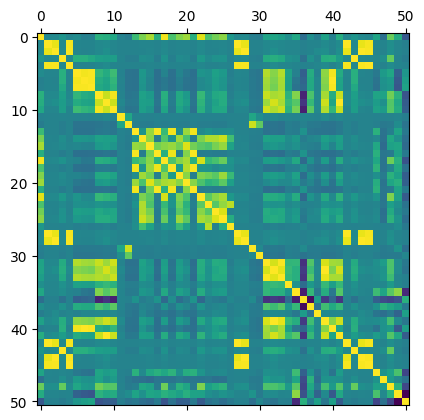

In [19]:
print("Before reducing of correlated columns: ")

corr_matrix = df_f.corr()
plt.matshow(corr_matrix)
plt.show()

##### While performing reduction of the correleated columns there is traversed only the values in the upper triangle appointed by the diagonal

In [20]:
threshold = 0.7

iters = range(len(corr_matrix.columns) - 1)
drop_cols = []

print("Correlated columns to drop: ")
for i in iters:
    for j in range(i + 1):
        item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        val = abs(item.values)

        if val >= threshold:
            drop_cols.append(col.values[0])

drop_cols = set(drop_cols)
print(drop_cols)

Correlated columns to drop: 
{'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Bwd IAT Std', 'Tot Bwd Pkts', 'Bwd IAT Mean', 'Flow IAT Max', 'Fwd IAT Std', 'Fwd Header Len', 'Bwd Pkt Len Mean', 'Label', 'ECE Flag Cnt', 'Fwd Pkt Len Mean', 'Bwd IAT Max', 'Pkt Size Avg', 'Fwd Pkt Len Std', 'Bwd Header Len', 'Bwd IAT Min', 'Pkt Len Max', 'Fwd IAT Max', 'TotLen Bwd Pkts', 'Flow IAT Min', 'Fwd IAT Mean', 'Bwd Seg Size Avg', 'Fwd Pkts/s', 'Bwd Pkt Len Std', 'Pkt Len Mean', 'Fwd IAT Min', 'Bwd IAT Tot', 'Fwd Seg Size Avg', 'Subflow Fwd Pkts', 'Pkt Len Std', 'Subflow Fwd Byts', 'Fwd IAT Tot'}


##### Should all of the  above columns be removed?

After reducing: 


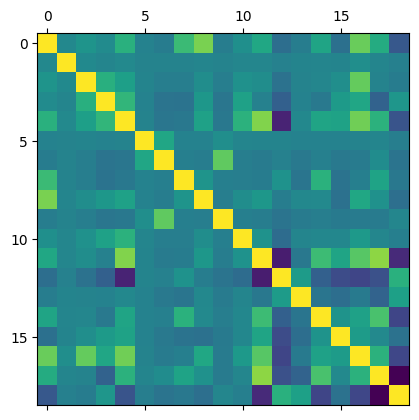

(9003839, 19)

In [21]:
drop_cols.remove("Label")
df_f.drop(columns=drop_cols, inplace=True, axis=1)
print("After reducing: ")
corr_matrix = df_f.corr()
plt.matshow(corr_matrix)
plt.show()
df_f.shape

In [22]:
print(df_f.columns)

Index(['Flow Duration', 'Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max',
       'Bwd Pkt Len Max', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Bwd Pkts/s', 'Pkt Len Var', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'Down/Up Ratio', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Label'],
      dtype='object')


#### Outlier detection and removal 

##### Should some features be removed?

In [23]:
# plt.figure(figsize=(20, 5))
# sns.boxplot(x="variable", y="value", data=pd.melt(df_f.iloc[:, :8]))
# plt.show()

In [24]:
# plt.figure(figsize=(20, 5))
# sns.boxplot(x="variable", y="value", data=pd.melt(df_f.iloc[:, 8:16]))
# plt.show()

In [25]:
# plt.figure(figsize=(20, 5))
# sns.boxplot(x="variable", y="value", data=pd.melt(df_f.iloc[:, 17:23]))
# plt.show()

#### Obtained features

In [26]:
df_f.head(5)

,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Max,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Bwd Pkts/s,Pkt Len Var,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Label
0,3974862,29,86.0,86.0,1460.0,15068.950821,18.365417,55206.416667,195478.316654,11.069567,531240.438541,0,0,1.0,-1,5840,1,0,1.0
1,63,1,0.0,0.0,0.0,0.000000,31746.031746,63.000000,0.000000,15873.015873,0.000000,0,1,1.0,-1,17520,0,0,1.0
2,476078,2,86.0,86.0,1460.0,6559.849436,16.803969,68011.142857,110862.707451,12.602977,400075.500000,0,0,3.0,-1,5840,1,0,1.0
3,151,2,0.0,0.0,0.0,0.000000,19867.549669,75.500000,98.287843,6622.516556,0.000000,0,1,0.0,-1,17520,0,0,1.0
4,472507,2,73.0,73.0,1050.0,2376.684367,14.814595,78751.166667,118675.492251,10.581854,135741.125000,0,0,2.0,-1,5840,1,0,1.0


In [27]:
import numpy as np

problematic_columns = df_f.columns[(np.abs(df_f.values) == np.inf).any(axis=0)]

print("Problematic columns:", problematic_columns)
problematic_rows = df_f.index[df_f.select_dtypes(include=['float64']).apply(lambda x: x.abs() == np.inf).any(axis=1)]
df_f = df_f.drop(problematic_rows)

Problematic columns: Index(['Flow Byts/s', 'Flow Pkts/s'], dtype='object')


#### Normalization

In [28]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_f), columns=df_f.columns)
scaled_df.head(5)

,Flow Duration,Tot Fwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Bwd Pkt Len Max,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Bwd Pkts/s,Pkt Len Var,PSH Flag Cnt,ACK Flag Cnt,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Label
0,3.312386e-02,0.000133,0.000043,0.003682,0.022406,0.000007,0.250002,4.601050e-04,0.002305,0.000004,0.001053,0.0,0.0,0.003215,0.0,0.089127,0.000728,0.0,1.0
1,5.333333e-07,0.000005,0.000000,0.000000,0.000000,0.000000,0.253968,5.333834e-07,0.000000,0.005291,0.000000,0.0,1.0,0.003215,0.0,0.267349,0.000000,0.0,1.0
2,3.967325e-03,0.000009,0.000043,0.003682,0.022406,0.000003,0.250002,5.668211e-04,0.001307,0.000004,0.000793,0.0,0.0,0.009646,0.0,0.089127,0.000728,0.0,1.0
3,1.266667e-06,0.000009,0.000000,0.000000,0.000000,0.000000,0.252483,6.375599e-07,0.000001,0.002208,0.000000,0.0,1.0,0.000000,0.0,0.267349,0.000000,0.0,1.0
4,3.937567e-03,0.000009,0.000037,0.003125,0.016114,0.000001,0.250002,6.563297e-04,0.001399,0.000004,0.000269,0.0,0.0,0.006431,0.0,0.089127,0.000728,0.0,1.0


### Split the dataset

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

print(set(scaled_df["Label"]))

ddos_train_data, ddos_test_data, \
ddos_train_target, ddos_test_target = \
train_test_split(preprocessing.StandardScaler().fit_transform(scaled_df.loc[:, scaled_df.columns != 'Label']),\
                 scaled_df['Label'], test_size=0.4, random_state=1)


{0.0, 1.0}


### Learning

#### Enabling search for optimal network configurations

In [30]:
search_optimal = False

#### Searching for optimal regression parameters

In [31]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

if search_optimal:
    parameters = {
        "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag"],
        "max_iter": [10, 20, 30],
        "tol": [1e-4, 1e-5, 1e-6, 1e-3],
        "multi_class": ["ovr", "multinomial"],
    }

    grid_search = GridSearchCV(LogisticRegression(), parameters, n_jobs=8, cv=4)
    grid_search.fit(ddos_train_data, ddos_train_target)

    grid_search.score(ddos_test_data, ddos_test_target)

    test_results = []
    for i in ["params", "mean_test_score", "std_test_score"]:
        test_results.append(grid_search.cv_results_[i])

    dist = []
    for i in range(len(test_results[1])):
        dist.append(abs(test_results[1][i] - 0.95))

    val, idx = min((val, idx) for (idx, val) in enumerate(dist))
    print("Best result is: ")
    print("params:", test_results[0][idx])
    print("mean_test_score:", test_results[1][idx])
    print("std_test_score:", test_results[2][idx])
    print()

#### Training logistic regression with found parameters

In [35]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

if search_optimal:
  logistic_regression_params = test_results[0][idx]
else:
  logistic_regression_params = {'max_iter': 10, 'multi_class': 'ovr', 'solver': 'newton-cg', 'tol': 0.0001}

logistic_regression = LogisticRegression(**logistic_regression_params)

logistic_regression.fit(ddos_train_data, ddos_train_target)

print("Mean squared error of a learned regression model: %.2f" % 
      mean_squared_error(ddos_test_target, logistic_regression.predict(ddos_test_data)))


Mean squared error of a learned regression model: 0.04


#### Decision tree

In [36]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

if search_optimal:
    parameters = {"splitter": ["best", "random"], "max_depth": [2, 3, 4, 5, 6, 7, 8]}

    grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=8, cv=4)
    grid_search.fit(ddos_train_data, ddos_train_target)

    print(grid_search.score(ddos_test_data, ddos_test_target))

    test_results = []
    for i in ["params", "mean_test_score", "std_test_score"]:
        test_results.append(grid_search.cv_results_[i])

    dist = []
    for i in range(len(test_results[1])):
        dist.append(abs(test_results[1][i] - 0.95))

    val, idx = min((val, idx) for (idx, val) in enumerate(dist))
    print("Best result is: ")
    print("params:", test_results[0][idx])
    print("mean_test_score:", test_results[1][idx])
    print("std_test_score:", test_results[2][idx])
    print()

0.9962940701229768
Best result is: 
params: {'max_depth': 5, 'splitter': 'random'}
mean_test_score: 0.9466136472234474
std_test_score: 0.007965717108571845



#### Training decision tree with found parameters

In [37]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

if search_optimal:
  decision_tree_params = test_results[0][idx]
else:
  decision_tree_params = {'max_depth': 5, 'splitter': 'random'}

decision_tree = DecisionTreeClassifier(**decision_tree_params)

decision_tree.fit(ddos_train_data, ddos_train_target)

print("Mean squared error of a learned regression model: %.2f" % 
      mean_squared_error(ddos_test_target, logistic_regression.predict(ddos_test_data)))


Mean squared error of a learned regression model: 0.04
